In [4]:
# Install VaderSentiment
#! pip install vaderSentiment

In [4]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import tweepy
import time
import seaborn as sns

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# Twitter API Keys
consumer_key = 'VnkpTfV719d9sKrxybKHJK6xm'
consumer_secret = 'hedlSHzpS0kfknoiLovgTmv5HwZvnfBL1gsR3OlDmC3XazIO85'
access_token = '967430033261416449-HOqMkbUEyXS4AqA663nFUGOHMqGI5pS'
access_token_secret = '14Zx1ayOT94LNCI7o2Kh9WC1B1UaVR08Yq4LA68pqaiHb'

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [8]:
target_users = ["@BBC", "@CBS", "@CNN", "@Fox", "@nytimes"]

# Counter
counter = 1

# Variables for holding sentiments
sentiments = []

# Loop through each user
for user in target_users:

    # Variables for holding sentiments
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []

    # Loop through 5 pages of tweets (total 100 tweets)
    for x in range(5):

        # Get all tweets from home feed
        public_tweets = api.user_timeline(user)

        # Loop through all tweets
        for tweet in public_tweets:

            # Run Vader Analysis on each tweet
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]

            # Add each value to the appropriate array
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)

            
            # Add sentiments for each tweet into an array
            sentiments.append({"Date": tweet["created_at"], 
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweets Ago": counter})


            # Add to counter 
            counter = counter + 1
            
            
            
    # Print the Averages
    print("")
    print("User: %s" % user)
    print("Compound: %s" % np.mean(positive_list))
    print("Positive: %s" % np.mean(positive_list))
    print("Neutral: %s" % np.mean(neutral_list))
    print("Negative: %s" % np.mean(negative_list))



User: @BBC
Compound: 0.1109
Positive: 0.1109
Neutral: 0.8658
Negative: 0.0233

User: @CBS
Compound: 0.10065
Positive: 0.10065
Neutral: 0.8842
Negative: 0.01515

User: @CNN
Compound: 0.06645
Positive: 0.06645
Neutral: 0.83135
Negative: 0.1022

User: @Fox
Compound: 0.09715
Positive: 0.09715
Neutral: 0.84255
Negative: 0.0603

User: @nytimes
Compound: 0.07015
Positive: 0.07015
Neutral: 0.90615
Negative: 0.0237


In [9]:
# Convert sentiments to DataFrame
sentiments_pd = pd.DataFrame.from_dict(sentiments)
sentiments_pd.head()

,Compound,Date,Negative,Neutral,Positive,Tweets Ago
0,0.0000,Mon Feb 26 21:29:41 +0000 2018,1.000,0.000,0.000,1
1,-0.2960,Mon Feb 26 21:29:17 +0000 2018,0.916,0.084,0.000,2
2,0.0000,Mon Feb 26 21:28:49 +0000 2018,1.000,0.000,0.000,3
3,0.2263,Mon Feb 26 21:26:41 +0000 2018,0.826,0.000,0.174,4
4,0.0000,Mon Feb 26 21:03:04 +0000 2018,1.000,0.000,0.000,5


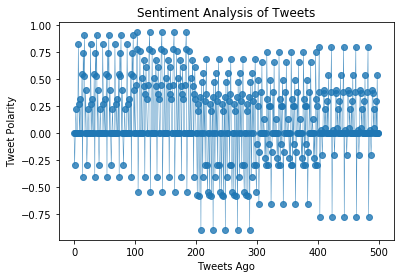

In [21]:
# Create plot
plt.plot(np.arange(len(sentiments_pd["Compound"])),
         sentiments_pd["Compound"], marker="o", linewidth=0.5,
         alpha=0.8)

# # Incorporate the other graph properties
plt.title('Sentiment Analysis of Tweets')
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.show()